In [5]:
# Part 1 
# The classes in this part are each of the neurons - general neuron, sensory neuron, motor neuron,
# photoreceptor, mechanoreceptor, alpha motor neuron & gamma motor neuron.
# The general neuron class is the base / parent class. All other classes have that classs attributes.
# The sensory neuron class and the motor neuron class are both derived from the general neuron class.
# They each inherit from it and focus on a diffrent type of neuron.
# From the sensory neuron class - two classes inherit. The photoreceptor and mechanoreceptor. 
# They are both subclasses of the sensory neuron class.
# Lastly, the alpha motor neuron and gamma motor neuron are both subclasses of the motor neuron class
# and both inherit from it.

In [6]:
# In order to plot a proper diagram to show the hierarchy - i chose to do it using python,
# and the modules matplotlib.pyplot and networkx.
# Matplotlib is generally used for graphs, and networkx is for creating visual networks

In [7]:
%pip install networkx
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/168.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/168.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/168.5 kB 262.6 kB/s eta 0:00:01
     ----------------- ------------------- 81.9/168.5 kB 459.5 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/168.5 kB 476.3 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/168.5 kB 437.6 kB/s eta 0:00:01
     -----------------------------------  163.8/168.5 kB 546.6 kB/s eta 0:00:01
     ------------------------------------ 168.5/168.5 kB 505.6 kB/s eta 0:00:00
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------

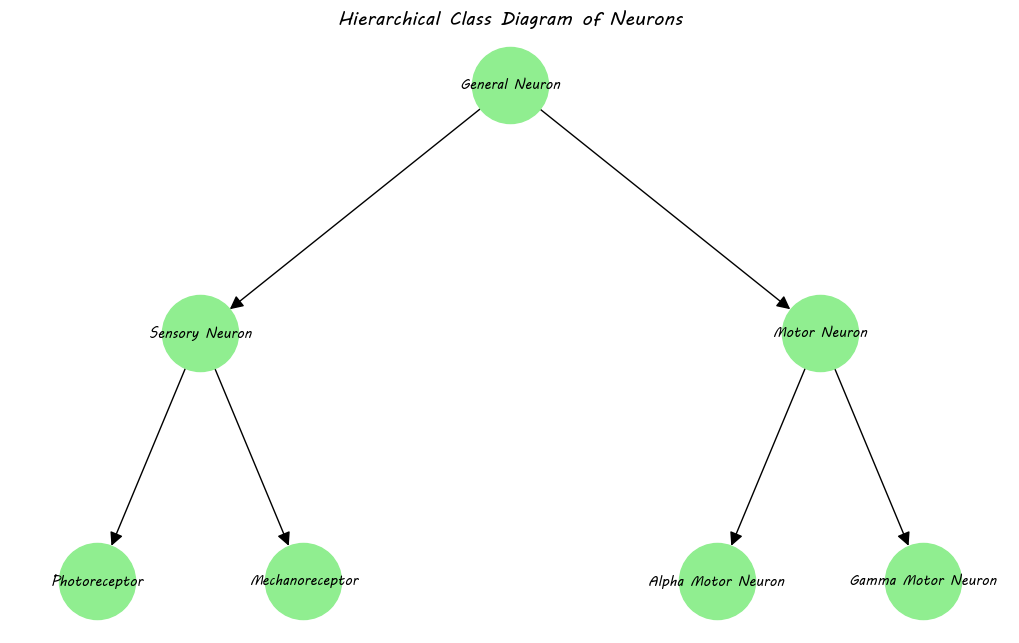

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx

# Create a directed graph
graph = nx.DiGraph()

# Add nodes and edges - the classes and their relationships 
nodes = [
    "General Neuron",
    "Sensory Neuron",
    "Motor Neuron",
    "Photoreceptor",
    "Mechanoreceptor",
    "Alpha Motor Neuron",
    "Gamma Motor Neuron"
]
edges = [
    ("General Neuron", "Sensory Neuron"),
    ("General Neuron", "Motor Neuron"),
    ("Sensory Neuron", "Photoreceptor"),
    ("Sensory Neuron", "Mechanoreceptor"),
    ("Motor Neuron", "Alpha Motor Neuron"),
    ("Motor Neuron", "Gamma Motor Neuron")
]

graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

# Define the positions for the nodes
positions = {
    "General Neuron": (0.5, 1.0),
    "Sensory Neuron": (0.2, 0.7),
    "Motor Neuron": (0.8, 0.7),
    "Photoreceptor": (0.1, 0.4),
    "Mechanoreceptor": (0.3, 0.4),
    "Alpha Motor Neuron": (0.7, 0.4),
    "Gamma Motor Neuron": (0.9, 0.4),
}

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(
    graph, pos=positions, with_labels=True, node_size=3000, node_color="lightgreen", 
    font_size=10, font_weight="bold", arrowsize=20, font_family='MV boli',
)
plt.title("Hierarchical Class Diagram of Neurons", fontsize=14, fontname='MV boli')
plt.show()

In [9]:
#The class defenition in python:
class General_Neuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate

    def activate(self, stimulus):
        # No implementation needed
        pass


class Sensory_Neuron(General_Neuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus_strength):
        # No implementation needed
        pass


class Motor_Neuron(General_Neuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    def control_muscle(self, activation_level):
        # No implementation needed
        pass


class Photoreceptor(Sensory_Neuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")

    def light_detection(self, light_intensity):
        # No implementation needed
        pass


class Mechanoreceptor(Sensory_Neuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")

    def pressure_detection(self, pressure_level):
        # No implementation needed
        pass


class Alpha_Motor_Neuron(Motor_Neuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def skeletal_muscle_control(self, activation_level):
        # No implementation needed
        pass


class Gamma_Motor_Neuron(Motor_Neuron):
    def __init__(self, firing_rate):
                super().__init__(firing_rate, target_muscle="muscle spindle")

    def muscle_spindle_control(self, tension_level):
        # No implementation needed
        pass

In [10]:
# Part 2 
%pip install scipy
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Q1
import numpy as np
from scipy.signal import argrelextrema

def downsample(signal,down_factor=5):
    # Gets the minimum and maximum
    maxima=argrelextrema(signal, np.greater)[0]
    minima=argrelextrema(signal, np.less)[0]

    # Combines them
    exterme_points = np.unique(np.concatenate((maxima, minima)))

    # Cuting the points, according to the down factor
    downsized_points = np.arange(0, len(signal), down_factor)

    # Combing the downsized points and the extremes
    all_points = np.unique(np.concatenate((downsized_points, exterme_points)))
    all_points.sort()

    downsized_signal = signal[all_points]

    # Returning the signal and the points
    return downsized_signal,all_points

# Creating a sample code to ensure accuracy
t=np.arange(0,1.0,0.01)
freq = 5
original_signal = np.sin(2*np.pi*freq*t)

downsized_signal, used_points = downsample(original_signal, down_factor=5)

print("Original length:", len(original_signal))
print("downsized lengh:", len(downsized_signal))
print("points used:", used_points)

Original length: 100
downsized lengh: 20
points used: [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


In [12]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


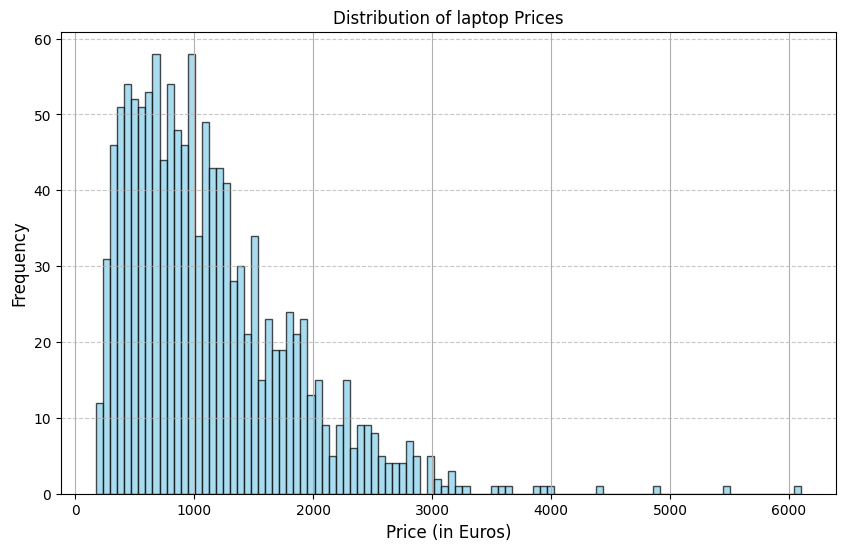

In [13]:
# Q2
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data set
data = pd.read_csv("./laptop_price - dataset.csv")

# Plottiong all laptops and their prices by frequency
# If i really wanted to understand the data here i would plot a subset or group the data, but for the assignment
# keeping to the instructions
plt.figure(figsize=(10,6))
data['Price (Euro)'].hist(bins=100, color = 'skyblue', edgecolor='black', alpha = 0.7)
plt.title('Distribution of laptop Prices')
plt.xlabel("Price (in Euros)", fontsize=12)
plt.ylabel("Frequency" , fontsize=12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()





In [14]:
# Finding the most expensive company of laptops and their price
mean_price_by_company = data.groupby('Company')['Price (Euro)'].mean()
most_expensive_company = mean_price_by_company.idxmax()
most_expensive_price = mean_price_by_company.max()

print(f"The company with the most expensive laptops on average is: {most_expensive_company}")
print(f"Their average laptops costs: {most_expensive_price}")

The company with the most expensive laptops on average is: Razer
Their average laptops costs: 3346.1428571428573


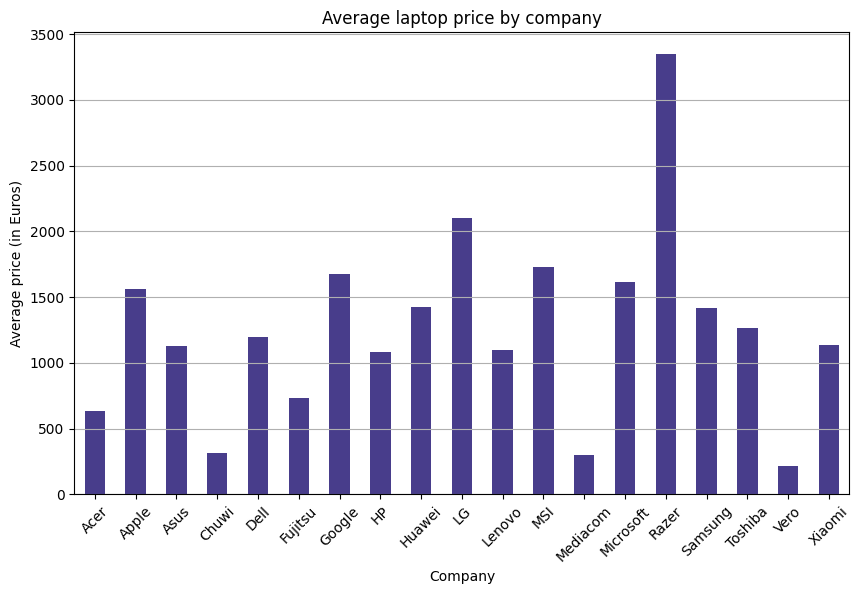

In [15]:
# Plotting the average laptop price for each company
mean_price_by_company.plot(kind = 'bar', figsize=(10,6), color = 'darkslateblue')
plt.title('Average laptop price by company')
plt.xlabel('Company')
plt.ylabel('Average price (in Euros)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [16]:
# Checking all unique OS names in the dataset
print(data['OpSys'].unique())

# Cleaning the data
# I decided to group all windows / Mac together
data['OpSys'] = data['OpSys'].str.strip().str.lower()
data['OpSys'] = data['OpSys'].replace({
    'mac os x': 'MacOS',
    'windows 10 S' : 'Windows',
    'windows 7' : 'Windows', 
    'windows 10' : 'Windows'
})

# The unique OS names after cleaning
print(data['OpSys'].unique())


['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
['macos' 'no os' 'Windows' 'MacOS' 'linux' 'android' 'windows 10 s'
 'chrome os']


In [17]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


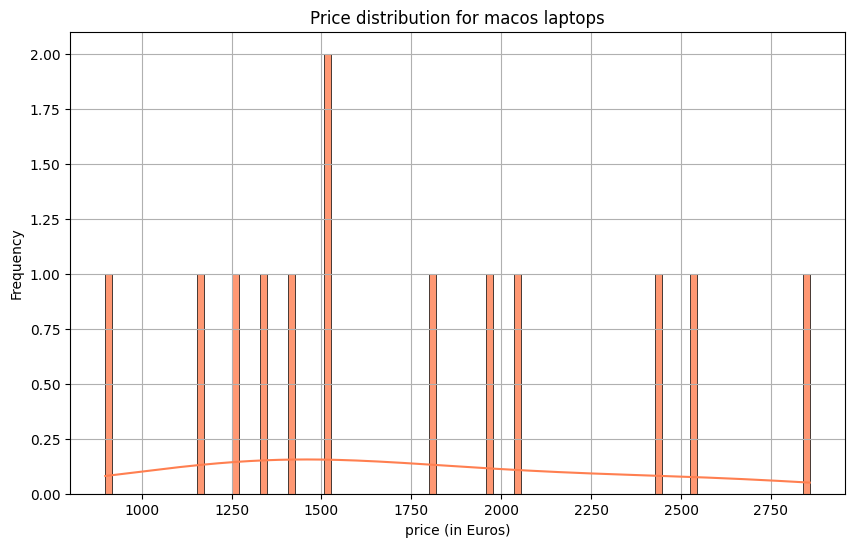

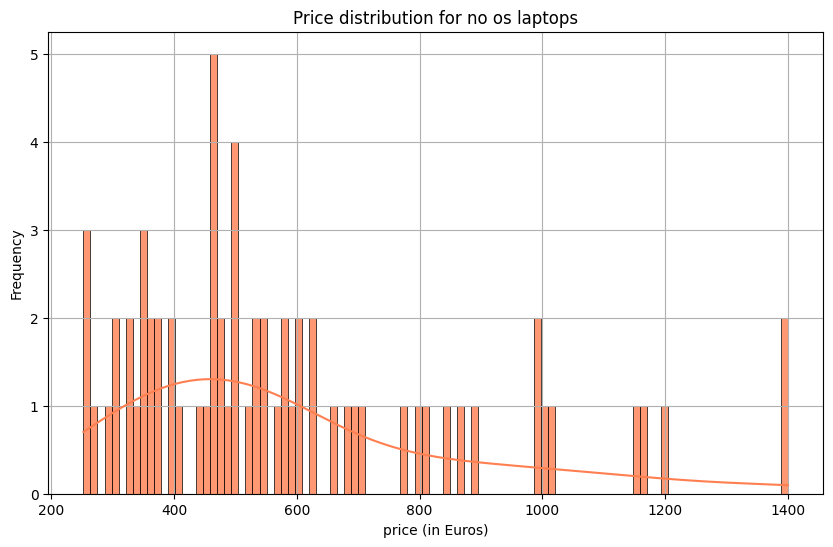

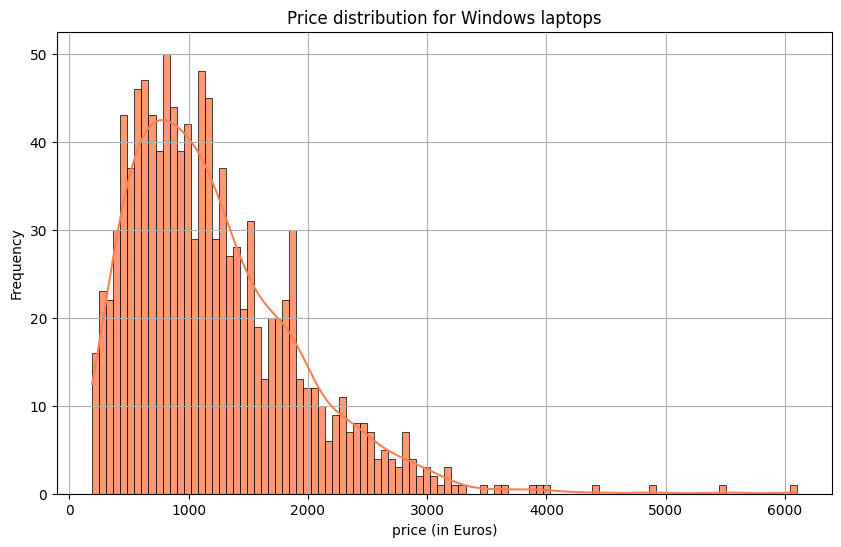

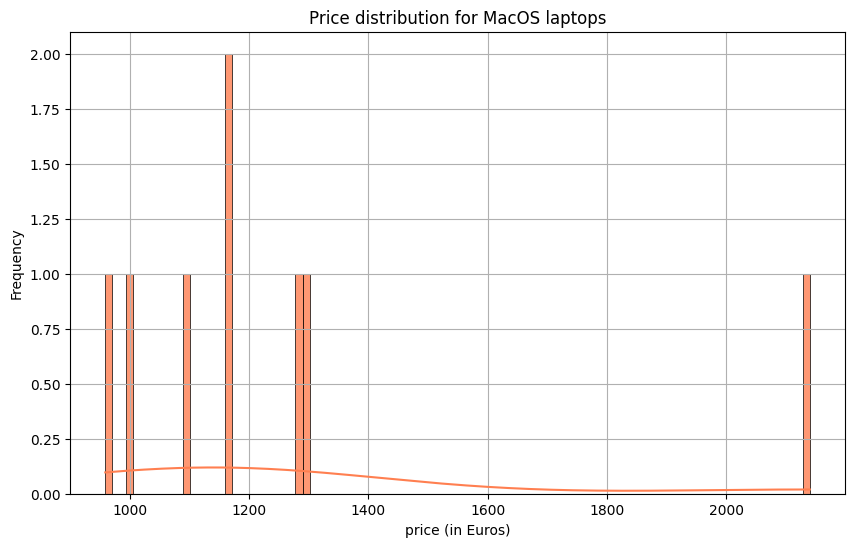

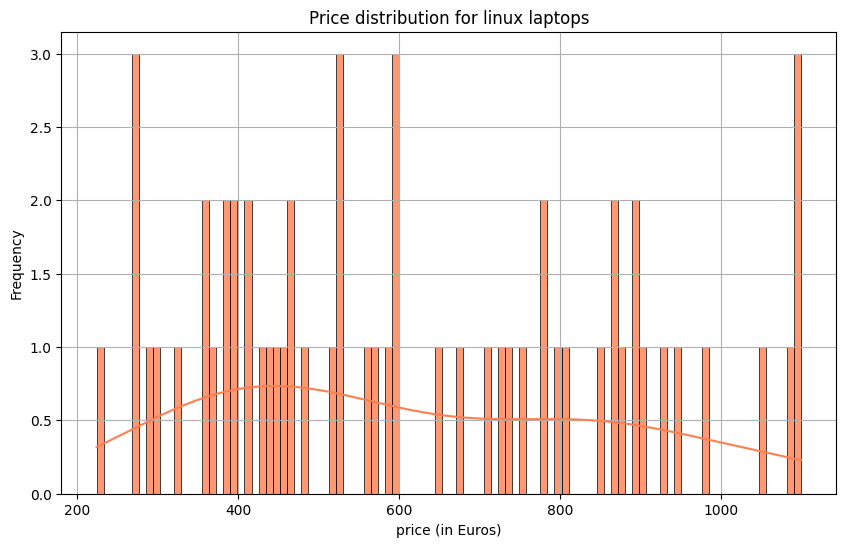

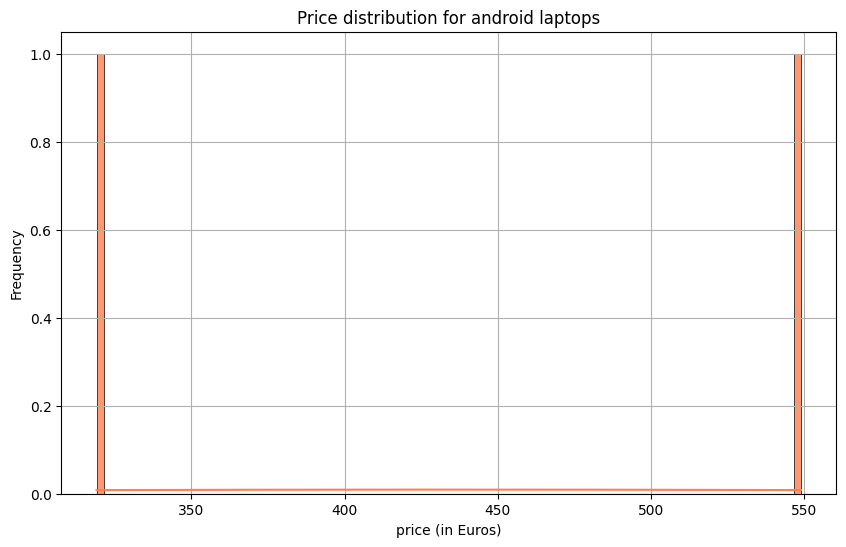

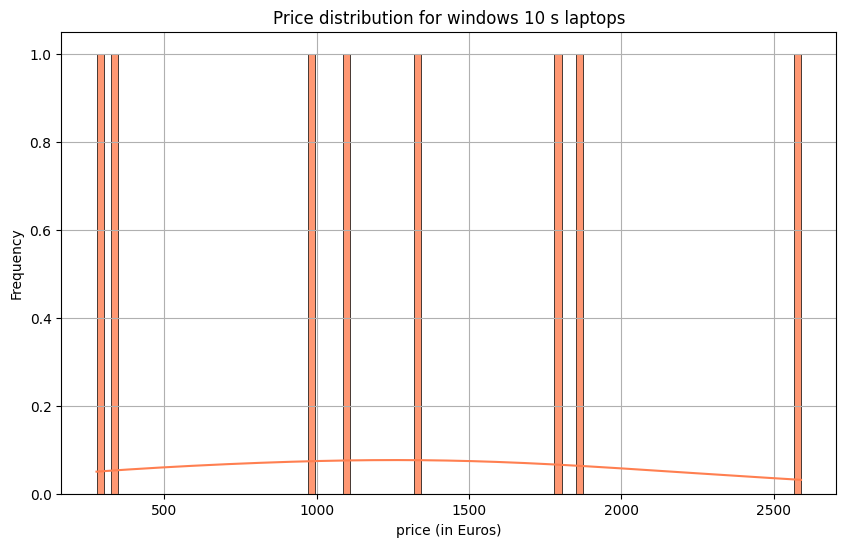

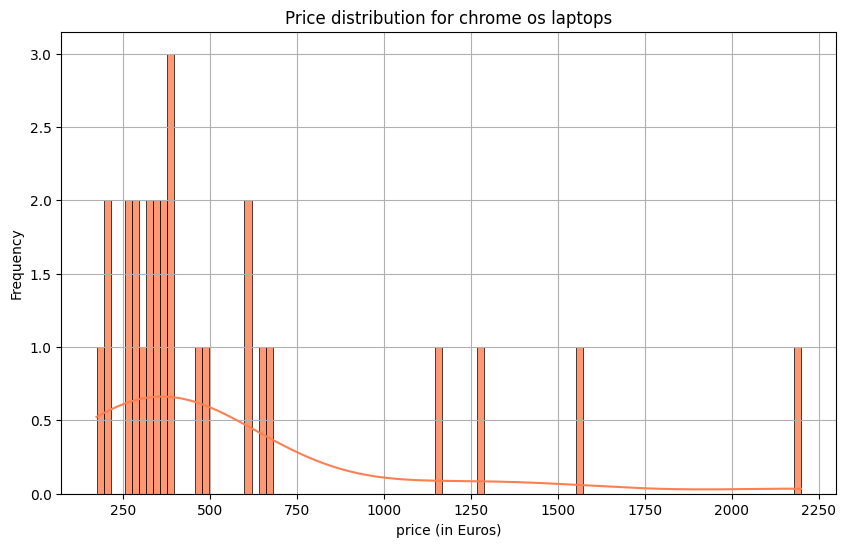

In [18]:
import seaborn as sns
# Plotting a price distribution for each OS
unique_os = data['OpSys'].unique()

# Going over all OS
for os in unique_os:
    os_data = data[data['OpSys']==os]
    plt.figure(figsize=(10,6))
    sns.histplot(os_data['Price (Euro)'], kde = True , bins =100, color = 'coral', alpha = 0.8)
    plt.title(f'Price distribution for {os} laptops')
    plt.xlabel('price (in Euros)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [19]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Equation of the line: Price = 101.76 * RAM + 276.03


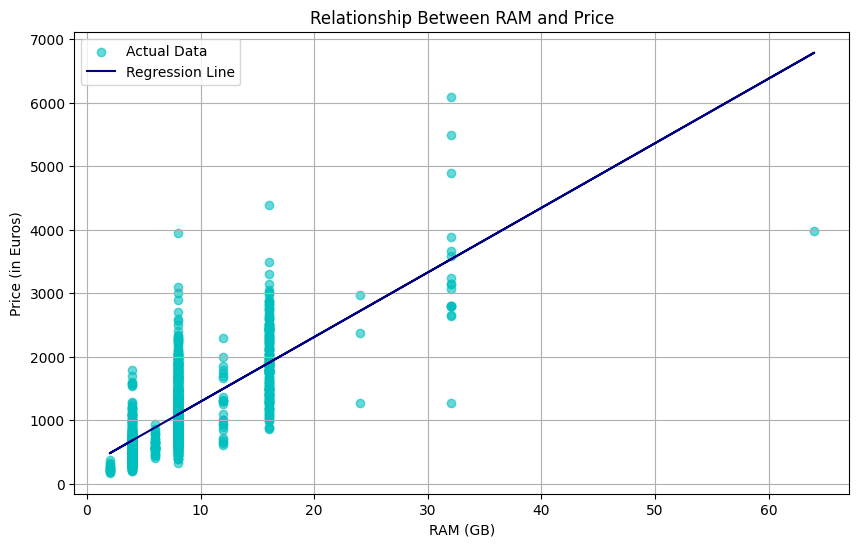

In [20]:
# Relationship between RAM and computer price
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# I wanted to show the relationship in the form of a linear regression because after first plotting 
# the data i saw it can be dscribed as such. 
X = data[['RAM (GB)']] 
y = data['Price (Euro)']
model = LinearRegression()
model.fit(X, y)

# Calculate  the predictions
y_pred = model.predict(X)

# Get the(m) and (b) of the line (y=mx+b)
m = model.coef_[0]
b = model.intercept_

# Print the equation of the line
print(f"Equation of the line: Price = {m:.2f} * RAM + {b:.2f}")

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='c', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred, color='navy', label='Regression Line')
plt.title('Relationship Between RAM and Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (in Euros)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model's performance
r2 = r2_score(y, y_pred)


In [21]:

# Storage type
# Getting all the storage types out of the memory column
data['Storage Type'] = data['Memory'].str.findall(r'(HDD|SSD|Flash|Hybrid)')
# Joining the multipule storage types when there are
data ['Storage Type'] = data['Storage Type'].apply(lambda x : '+' .join(x))
unique_mt = data['Storage Type'].unique()

# Proving that it worked by printing the first few colums of 'Memory' side by side with 'Storage Type', 
# and also the unique values of 'Storage type'
print (data[['Memory','Storage Type']].head() )
print(unique_mt)


                Memory Storage Type
0            128GB SSD          SSD
1  128GB Flash Storage        Flash
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD
['SSD' 'Flash' 'HDD' 'SSD+HDD' 'SSD+SSD' 'Hybrid' 'Flash+HDD' 'HDD+HDD'
 'SSD+Hybrid']


In [22]:
# Bonus
# More questions about the data:
# 1. If we were to unite all the data regarding the performace of the laptops (RAM, storage, CPU, etc. )
# is there a diffrence with the diffefrent companies?
# 2. How does each feature correlate with every other feature? 
# 3. Is there a storage type that is more expensive than others?
# 4. Can a model predict the price of a laptop given its features? 
# 5. Do lighter laptops costs more or less than heavier ones?


C:\Users\david\anaconda3\envs\ml\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


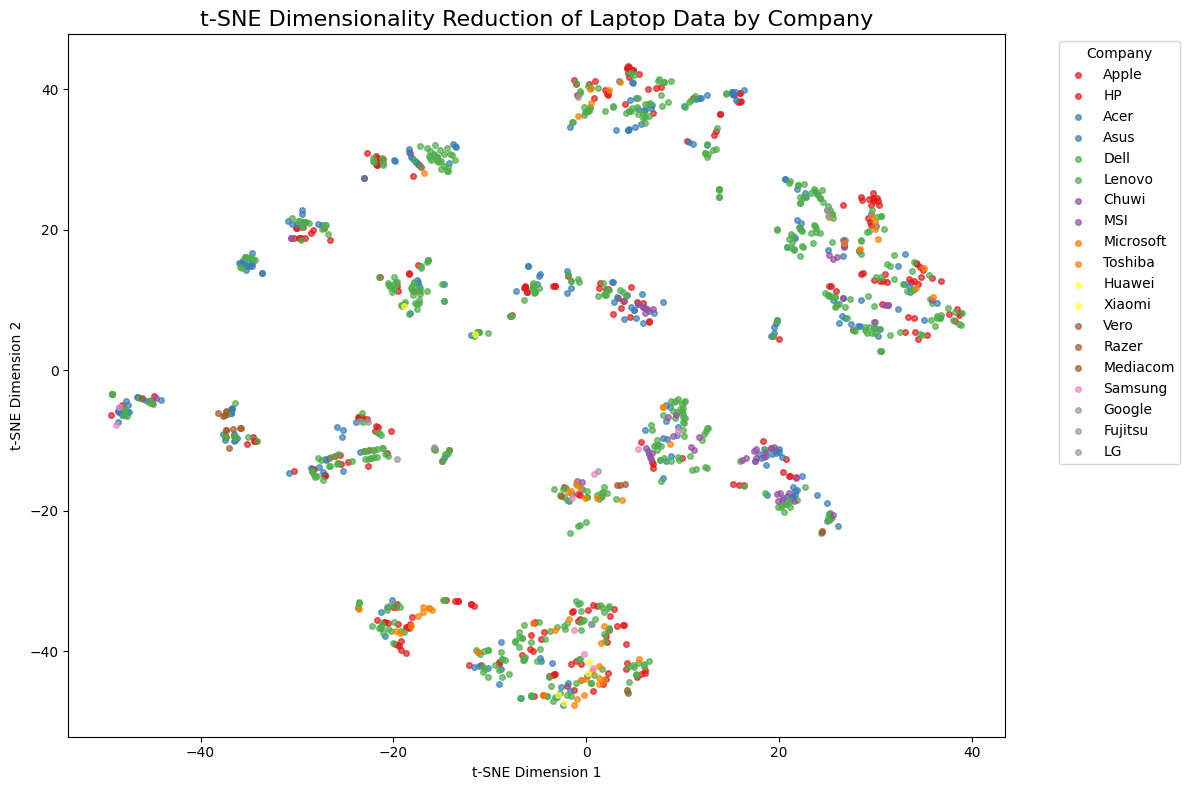

In [23]:
# Bonus Q1
# If we were to unite all the data regarding the performace of the laptops (RAM, storage, CPU, etc. )
# is there a diffrence with the diffefrent companies?
# I was only able to do this with the numerical featues.

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


# Take the numerical features
numerical_features = ['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']
data_numerical = data[numerical_features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Used T-Sne to analyse the data
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(data_scaled)
data['TSNE-1'] = tsne_results[:, 0]
data['TSNE-2'] = tsne_results[:, 1]

# Showing the results in a plot
plt.figure(figsize=(12, 8))
colors = plt.cm.Set1(np.linspace(0, 1, data['Company'].nunique()))
company_colors = {company: colors[i] for i, company in enumerate(data['Company'].unique())}

for company, color in company_colors.items():
    subset = data[data['Company'] == company]
    plt.scatter(subset['TSNE-1'], subset['TSNE-2'], label=company, alpha=0.7, c=[color] , marker = '.', s=65)

plt.title('t-SNE Dimensionality Reduction of Laptop Data by Company', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# After seeing the results - 
# I tried playing around with the display of the data in order to try to undersatnd it as much as possible,
# however with so much data it's hard to see. If i wanted to understand the data more, i would observe less 
# companies in order to really see where there is a difference. 


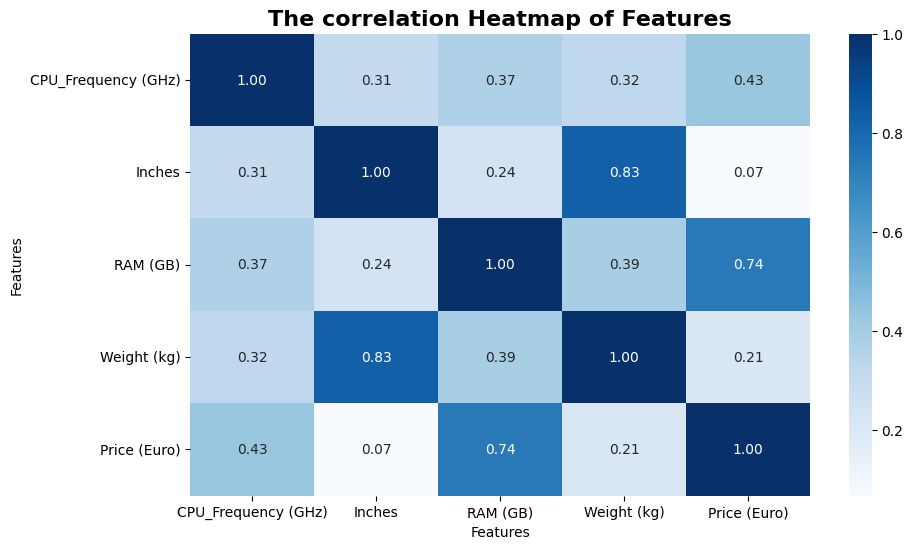

In [24]:
# Bonus Q2 
# How does each feature correlate with every other feature? 

# Calculating the correlation between the numeric features
correlation = data[['CPU_Frequency (GHz)', 'Inches', 'RAM (GB)', 'Weight (kg)' , 'Price (Euro)']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot= True, cmap='Blues', fmt= ".2f")
plt.title("The correlation Heatmap of Features", fontsize = 16, weight = 'bold')
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()